In [533]:
import pickle
import os
import numpy as np

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']

num_objs = [11, 8, 5]
difficulties = [3, 2, 1]
probs = [1,2,3,4,5,6,7,8,9,10]
total_time = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
total_time2 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    
total_time3 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    
total_action = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_perception_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_ros_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_mp_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_pg_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_mp_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_pg_percentage = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}

total_perception_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_ros_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_mp_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_pg_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_mp_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
total_rg_pg_calls = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}


total_remaining_area = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    

# total_remaining_area = []

for num_obj in num_objs:
    for difficulty in difficulties:
        for prob in probs:
            trials = 5
            max_trial = 6

            for trial in range(max_trial-trials,max_trial):
                # print(' number of objects: ', num_obj, ', difficulty level: ', difficulty, 
                #       ', prob: ', prob, ', trial: ', trial, '...')
                # if the result file already exists, skip
                fname = 'results/simple/prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                if os.path.exists(fname):
                    f = open(fname, 'rb')
                    data = pickle.load(f)
                    running_time = data['running_time']
                    ros_time = data['ros_time']
                    num_action = data['num_executed_actions']
                    perception_time = data['perception_time']
                    motion_planning_time = data['motion_planning_time']
                    pose_generation_time = data['pose_generation_time']
                    rearrange_time = data['rearrange_time']
                    rearrange_motion_planning_time = data['rearrange_motion_planning_time']
                    rearrange_pose_generation_time = data['rearrange_pose_generation_time']
                    
                    perception_calls = data['perception_calls']
                    ros_calls = data['execution_calls']
                    mp_calls = data['motion_planning_calls']
                    pg_calls = data['pose_generation_calls']
                    rg_calls = data['rearrange_calls']
                    rg_mp_calls = data['rearrange_motion_planning_calls']
                    rg_pg_calls = data['rearrange_pose_generation_calls']
                    
                    recon = data['num_reconstructed_objs']
                    
                    f.close()
                    
                    if num_obj != recon:
                        print('failed case: num_obj: ', num_obj)
                        
                    if 'final_occluded_volume' not in data:
                        print('final_occluded_volume not in data')
                        print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                            (num_obj, difficulty, prob, trial))

                    if data['num_reconstructed_objs'] != num_obj:
                        print('num_reconstructed_objs does not match')
                        print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                            (num_obj, difficulty, prob, trial))
                        print(data)
                    total_time[num_obj][difficulty].append(running_time)
                    total_action[num_obj][difficulty].append(num_action)
                    if prob not in total_time2[num_obj][difficulty]:
                        total_time2[num_obj][difficulty][prob] = []
                    total_time2[num_obj][difficulty][prob].append(running_time)
                    total_perception_percentage[num_obj][difficulty].append(perception_time/running_time)
                    total_ros_percentage[num_obj][difficulty].append(ros_time/running_time)
                    total_mp_percentage[num_obj][difficulty].append(motion_planning_time/running_time)
                    total_pg_percentage[num_obj][difficulty].append(pose_generation_time/running_time)
                    total_rg_percentage[num_obj][difficulty].append(rearrange_time/running_time)
                    total_rg_mp_percentage[num_obj][difficulty].append(rearrange_motion_planning_time/rearrange_time)
                    total_rg_pg_percentage[num_obj][difficulty].append(rearrange_pose_generation_time/rearrange_time)
                    
                    total_perception_calls[num_obj][difficulty].append(perception_calls)
                    total_ros_calls[num_obj][difficulty].append(ros_calls)
                    total_mp_calls[num_obj][difficulty].append(mp_calls)
                    total_pg_calls[num_obj][difficulty].append(pg_calls)
                    total_rg_calls[num_obj][difficulty].append(rg_calls)
                    total_rg_mp_calls[num_obj][difficulty].append(rg_mp_calls)
                    total_rg_pg_calls[num_obj][difficulty].append(rg_pg_calls)

                    total_remaining_area[num_obj][difficulty].append(data['final_occluded_volume'])

In [534]:
for num_obj in num_objs:
    for difficulty in difficulties:
        total_time[num_obj][difficulty] = np.array(total_time[num_obj][difficulty])
        total_action[num_obj][difficulty] =  np.array(total_action[num_obj][difficulty])


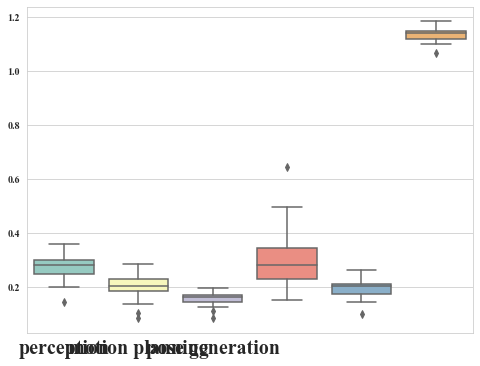

number of objects:  11  difficulty:  3
perception:  0.3919400776188954
motion planning:  0.2922731450440991
pose generation:  0.22613897137031536
rearrange:  0.2995727935406063
ros:  0.2797689877728064
remaining:  0.14107170814683934
remaining:  0.20181889581277906
number of calls: 
perception:  310.7
ros: , 725.92
motion planning:  101.66
pose generation:  95.28
rearragement:  5.52
average execution time:  0.13325252965818973
average motion planning time:  1.0092494553019542
average pose generation time:  0.8234023834410755
perception generation time:  0.22491561209810837
average rearrange time:  28.787022272149724


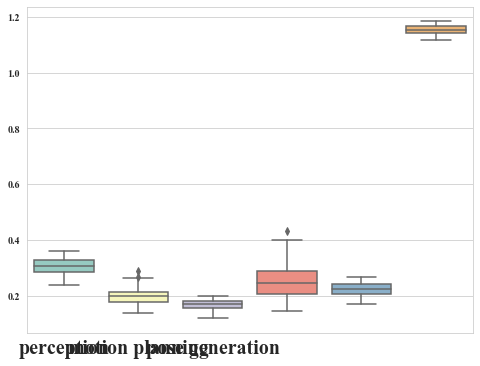

number of objects:  11  difficulty:  2
perception:  0.412313964857583
motion planning:  0.26927451754634996
pose generation:  0.2245137588779799
rearrange:  0.25732467054388747
ros:  0.29977018677886685
remaining:  0.15324170048064772
remaining:  0.2064415367968034
number of calls: 
perception:  309.68
ros: , 720.78
motion planning:  101.22
pose generation:  94.34
rearragement:  5.06
average execution time:  0.13350604072069905
average motion planning time:  0.8632920363639918
average pose generation time:  0.7650704898719272
perception generation time:  0.21408722280368092
average rearrange time:  23.008440488202233


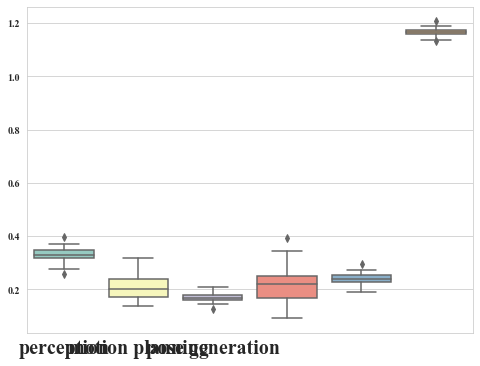

number of objects:  11  difficulty:  1
perception:  0.4228623469348515
motion planning:  0.26253871443555704
pose generation:  0.21927872110575136
rearrange:  0.21872412143012837
ros:  0.3084846047604955
remaining:  0.1634106865677282
remaining:  0.2096979596981961
number of calls: 
perception:  309.92
ros: , 718.06
motion planning:  101.4
pose generation:  94.68
rearragement:  4.82
average execution time:  0.13400744827448852
average motion planning time:  0.8174954075238741
average pose generation time:  0.7241089687978354
perception generation time:  0.21103841239991358
average rearrange time:  18.819396343140376


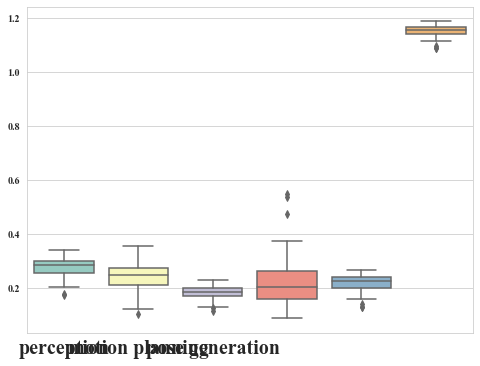

number of objects:  8  difficulty:  3
perception:  0.3636605412648408
motion planning:  0.31161730855890396
pose generation:  0.23760483160369325
rearrange:  0.22884054306264395
ros:  0.28469957881590113
remaining:  0.12717324553026524
remaining:  0.16607828102150168
number of calls: 
perception:  225.6
ros: , 521.02
motion planning:  73.68
pose generation:  68.88
rearragement:  3.28
average execution time:  0.13271356723951422
average motion planning time:  1.041767289909148
average pose generation time:  0.8401726015242036
perception generation time:  0.17917647571294498
average rearrange time:  23.43368327919642


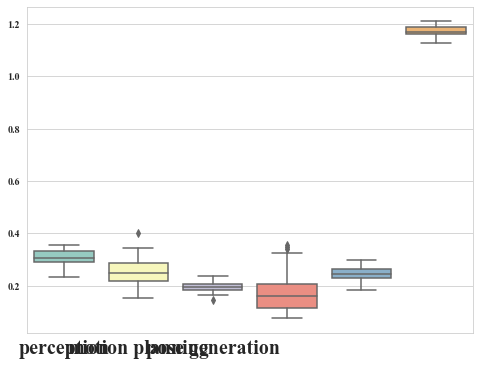

number of objects:  8  difficulty:  2
perception:  0.3710244608316492
motion planning:  0.30505174788591605
pose generation:  0.23650958063117752
rearrange:  0.17085501481971388
ros:  0.29475991160236004
remaining:  0.1352725609203225
remaining:  0.16367875988054642
number of calls: 
perception:  223.06
ros: , 514.52
motion planning:  73.56
pose generation:  67.52
rearragement:  2.66
average execution time:  0.13361100819920538
average motion planning time:  0.9823165608650715
average pose generation time:  0.8202965270443086
perception generation time:  0.17122915034531386
average rearrange time:  18.500423248211543


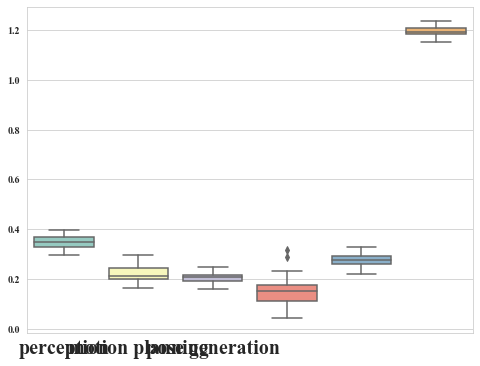

number of objects:  8  difficulty:  1
perception:  0.407476820688534
motion planning:  0.2582989890867099
pose generation:  0.23914950193436482
rearrange:  0.148104795692609
ros:  0.32511790363741233
remaining:  0.15070991259862768
remaining:  0.17743360534151298
number of calls: 
perception:  223.6
ros: , 513.6
motion planning:  73.16
pose generation:  67.8
rearragement:  2.52
average execution time:  0.13350864667039547
average motion planning time:  0.7531022194043518
average pose generation time:  0.7462478880503813
perception generation time:  0.16752654667022757
average rearrange time:  15.156153378883996


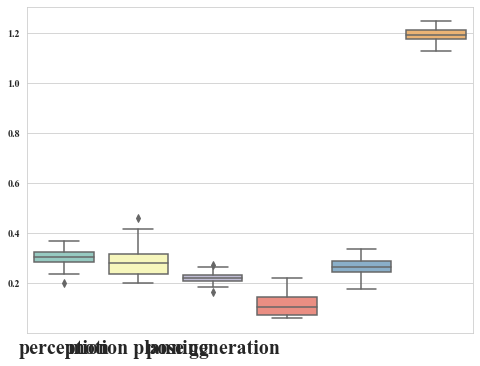

number of objects:  5  difficulty:  3
perception:  0.34347472308546456
motion planning:  0.321279415134418
pose generation:  0.25168950637279947
rearrange:  0.11500692741159814
ros:  0.30091953499448504
remaining:  0.11148964099634534
remaining:  0.12611154349829748
number of calls: 
perception:  138.92
ros: , 318.9
motion planning:  45.72
pose generation:  41.7
rearragement:  1.36
average execution time:  0.13265200837807684
average motion planning time:  1.0194440483441893
average pose generation time:  0.8551655499991603
perception generation time:  0.12806907725229677
average rearrange time:  14.06529949426651


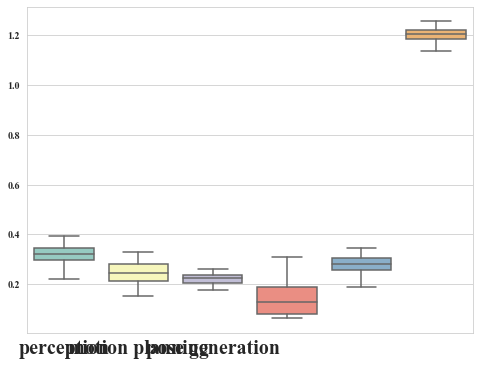

number of objects:  5  difficulty:  2
perception:  0.3683529722705047
motion planning:  0.28451053000102255
pose generation:  0.2574558926145428
rearrange:  0.14028788081772578
ros:  0.3228364421098715
remaining:  0.11604883149313949
remaining:  0.1351971352745632
number of calls: 
perception:  139.64
ros: , 320.96
motion planning:  45.44
pose generation:  41.9
rearragement:  1.52
average execution time:  0.13198414833017524
average motion planning time:  0.8402689968898471
average pose generation time:  0.8113891943922448
perception generation time:  0.1272163433574437
average rearrange time:  14.459716709454854


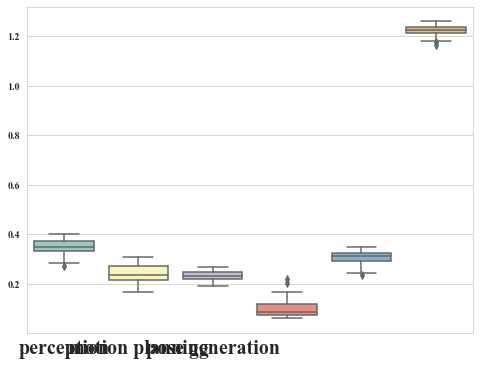

number of objects:  5  difficulty:  1
perception:  0.38477548346842705
motion planning:  0.26525962199011033
pose generation:  0.25759838053442924
rearrange:  0.098343223957572
ros:  0.34026077832078727
remaining:  0.1233938373401505
remaining:  0.1368812191546731
number of calls: 
perception:  139.02
ros: , 317.98
motion planning:  45.92
pose generation:  41.86
rearragement:  1.12
average execution time:  0.1329809854229516
average motion planning time:  0.7265287482435788
average pose generation time:  0.7685435979851616
perception generation time:  0.12265957271514848
average rearrange time:  12.276905879974365


In [535]:
import seaborn as sb
import matplotlib.pyplot as plt
pc_num = []
mp_num = []
pg_num = []
rg_num = []
ros_num = []

avg_ros = []
avg_mp = []
avg_pg = []
avg_pc = []
avg_rg = []

for num_obj in num_objs:
    for difficulty in difficulties:
        fig, ax = plt.subplots(figsize=(8,6))
        total_perception_percentage[num_obj][difficulty] = np.array(total_perception_percentage[num_obj][difficulty])
        total_mp_percentage[num_obj][difficulty] = np.array(total_mp_percentage[num_obj][difficulty])
        total_pg_percentage[num_obj][difficulty] = np.array(total_pg_percentage[num_obj][difficulty])
        total_rg_percentage[num_obj][difficulty] = np.array(total_rg_percentage[num_obj][difficulty])
        total_ros_percentage[num_obj][difficulty] = np.array(total_ros_percentage[num_obj][difficulty])
        total_sum = total_perception_percentage[num_obj][difficulty] + total_mp_percentage[num_obj][difficulty] + \
                    total_pg_percentage[num_obj][difficulty] + total_rg_percentage[num_obj][difficulty] + total_ros_percentage[num_obj][difficulty]
        sb.boxplot(data=[total_perception_percentage[num_obj][difficulty], 
                         total_mp_percentage[num_obj][difficulty], 
                         total_pg_percentage[num_obj][difficulty],
                         total_rg_percentage[num_obj][difficulty],
                         total_ros_percentage[num_obj][difficulty],
                         total_sum], palette="Set3")
        plt.xticks(np.arange(3), ['perception', 'motion planning', 'pose generation', 'rearrange', 'ros', 'total'], fontsize=20)

#         total_rg_mp_percentage[num_obj][difficulty]
#         total_rg_pg_percentage[num_obj][difficulty]        
        plt.show()
        print('number of objects: ', num_obj, ' difficulty: ', difficulty)
        remain = 1 - total_ros_percentage[num_obj][difficulty] - total_rg_percentage[num_obj][difficulty] - \
                total_pg_percentage[num_obj][difficulty] - total_mp_percentage[num_obj][difficulty]
        print('perception: ', (total_perception_percentage[num_obj][difficulty]/(1-total_rg_percentage[num_obj][difficulty])).mean())
        print('motion planning: ', (total_mp_percentage[num_obj][difficulty]/(1-total_rg_percentage[num_obj][difficulty])).mean())
        print('pose generation: ', (total_pg_percentage[num_obj][difficulty]/(1-total_rg_percentage[num_obj][difficulty])).mean())
        print('rearrange: ', total_rg_percentage[num_obj][difficulty].mean())
        print('ros: ', (total_ros_percentage[num_obj][difficulty]/(1-total_rg_percentage[num_obj][difficulty])).mean())
        print('remaining: ', remain.mean())
        print('remaining: ', (remain/(1-total_rg_percentage[num_obj][difficulty])).mean())

        print('number of calls: ')
        print('perception: ', np.mean(total_perception_calls[num_obj][difficulty]))
        print('ros: ,', np.mean(total_ros_calls[num_obj][difficulty]))
        print('motion planning: ', np.mean(total_mp_calls[num_obj][difficulty]))
        print('pose generation: ', np.mean(total_pg_calls[num_obj][difficulty]))
        print('rearragement: ', np.mean(total_rg_calls[num_obj][difficulty]))
        pc_num.append(total_perception_calls[num_obj][difficulty])
        mp_num.append(total_mp_calls[num_obj][difficulty])
        pg_num.append(total_pg_calls[num_obj][difficulty])
        rg_num.append(total_rg_calls[num_obj][difficulty])
        ros_num.append(total_ros_calls[num_obj][difficulty])
        
        print('average execution time: ', (total_time[num_obj][difficulty]*total_ros_percentage[num_obj][difficulty]/np.array(total_ros_calls[num_obj][difficulty])).mean())
        print('average motion planning time: ', (total_time[num_obj][difficulty]*total_mp_percentage[num_obj][difficulty]/np.array(total_mp_calls[num_obj][difficulty])).mean())
        print('average pose generation time: ', (total_time[num_obj][difficulty]*total_pg_percentage[num_obj][difficulty]/np.array(total_pg_calls[num_obj][difficulty])).mean())
        print('perception generation time: ', (total_time[num_obj][difficulty]*remain/np.array(total_perception_calls[num_obj][difficulty])).mean())
        print('average rearrange time: ', (total_time[num_obj][difficulty]*total_rg_percentage[num_obj][difficulty]/np.array(total_rg_calls[num_obj][difficulty])).mean())
        
        avg_ros.append(total_time[num_obj][difficulty]*total_ros_percentage[num_obj][difficulty]/np.array(total_ros_calls[num_obj][difficulty]))
        avg_mp.append(total_time[num_obj][difficulty]*total_mp_percentage[num_obj][difficulty]/np.array(total_mp_calls[num_obj][difficulty]))
        avg_pg.append(total_time[num_obj][difficulty]*total_pg_percentage[num_obj][difficulty]/np.array(total_pg_calls[num_obj][difficulty]))
        avg_pc.append(total_time[num_obj][difficulty]*remain/np.array(total_perception_calls[num_obj][difficulty]))
        avg_rg.append(total_time[num_obj][difficulty]*total_rg_percentage[num_obj][difficulty]/np.array(total_rg_calls[num_obj][difficulty]))
#         total_mp_calls[num_obj][difficulty].append(mp_calls)
#         total_pg_calls[num_obj][difficulty].append(pg_calls)
#         total_rg_calls[num_obj][difficulty].append(rg_calls)
#         total_rg_mp_calls[num_obj][difficulty].append(rp_mp_calls)
#         total_rg_pg_calls[num_obj][difficulty].append(rg_pg_calls)
        
        

        

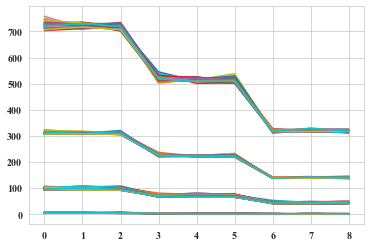

In [536]:
plt.plot(pc_num)
plt.plot(mp_num)
plt.plot(pg_num)
plt.plot(rg_num)
plt.plot(ros_num)


In [537]:
avg_ros = np.concatenate(avg_ros, axis=0)
avg_mp = np.concatenate(avg_mp, axis=0)
avg_pg = np.concatenate(avg_pg, axis=0)
avg_pc = np.concatenate(avg_pc, axis=0)
avg_rg = np.concatenate(avg_rg, axis=0)


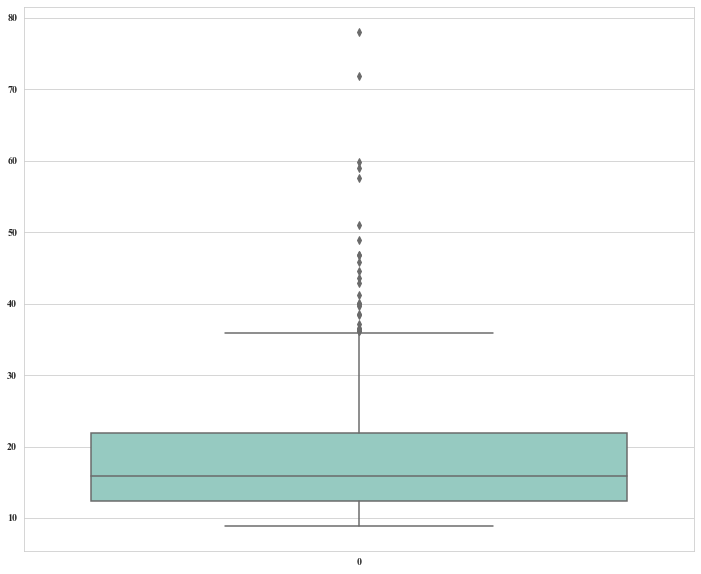

In [538]:

fig, ax = plt.subplots(figsize=(12,10))

sb.boxplot(data=[avg_rg
                ], palette="Set3")
# plt.xticks(np.arange(5), ['perception', 'motion planning', 'pose generation', 'rearrange', 'ros'], fontsize=20)
start, end = ax.get_ylim()
# ax.yaxis.set_ticks(np.arange(start, end, 0.05))


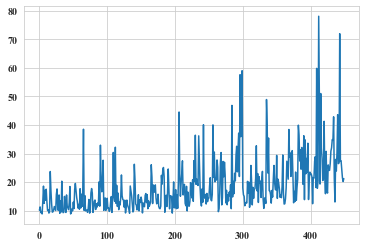

In [539]:
plt.plot(avg_rg[::-1])

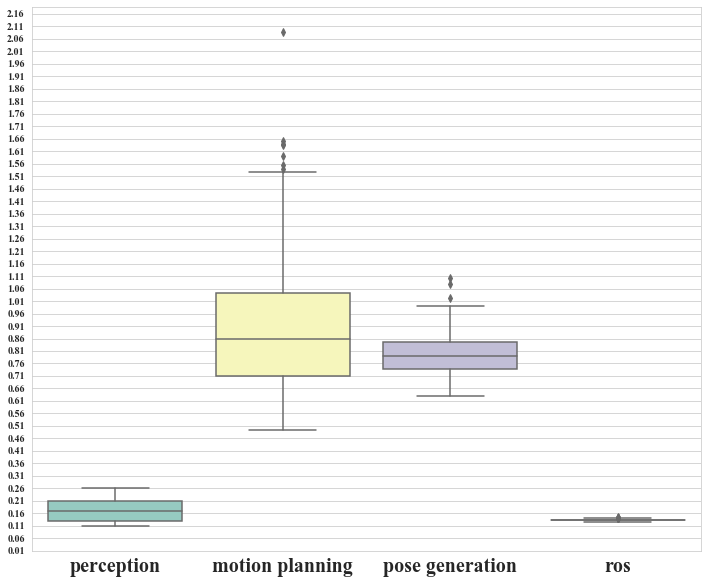

In [540]:

fig, ax = plt.subplots(figsize=(12,10))

sb.boxplot(data=[avg_pc,
                 avg_mp, 
                 avg_pg,
#                  avg_rg,
                 avg_ros
                ], palette="Set3")
# plt.xticks(np.arange(5), ['perception', 'motion planning', 'pose generation', 'rearrange', 'ros'], fontsize=20)
plt.xticks(np.arange(4), ['perception', 'motion planning', 'pose generation', 'ros'], fontsize=20)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.05))


In [541]:
total_time

{11: {3: array([ 463.85766244,  422.33204532,  472.25186753,  458.61021423,
          464.8866365 ,  579.98917007, 1002.02463675,  533.56624293,
          508.44563341,  619.56886005,  579.74125195,  499.76914001,
          498.2505517 ,  364.63682485,  492.78632832,  640.55933881,
          643.47441554,  614.2563653 ,  664.00567031,  549.62326622,
          497.87504172,  464.71818018,  419.86949801,  479.5925324 ,
          417.53486395,  398.0671742 ,  461.16877508,  444.76152754,
          432.32399321,  478.34306741,  459.08077478,  478.39224958,
          466.30383658,  548.93235517,  675.58650541,  482.65288544,
          566.44203711,  586.82231259,  556.65187049,  431.01129818,
          602.29503012,  423.92767644,  440.45729637,  462.02050781,
          435.86974478,  481.15748882,  390.68376327,  463.54627371,
          462.14009237,  446.99192476]),
  2: array([399.1388731 , 373.14777541, 383.99515414, 466.51661253,
         443.62300277, 443.92050624, 439.96235132, 519.0

0.98
49
50


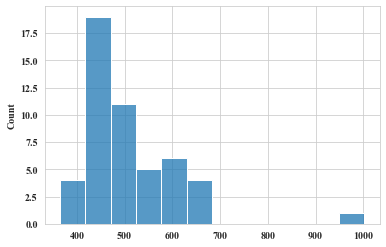

In [542]:
import pandas as pd
import seaborn as sb

sb.histplot(data=total_time[11][3])
print((total_time[11][3]<700).sum() / len(total_time[11][3]))
total_time[11][3][total_time[11][3]<700].mean()

print((total_time[11][3]<700).sum())
print(len(total_time[11][3]))

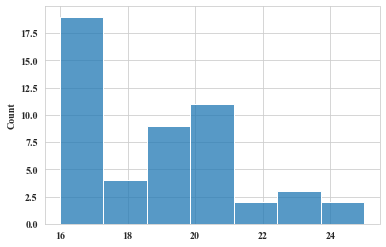

In [543]:
sb.histplot(data=total_action[11][3])

1.0
50
50


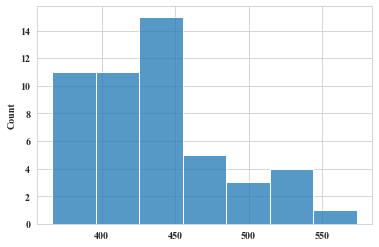

In [544]:
sb.histplot(data=total_time[11][2])
print((total_time[11][2]<600).sum() / len(total_time[11][2]))
total_time[11][2][total_time[11][2]<600].mean()

print((total_time[11][2]<600).sum())
print(len(total_time[11][2]))

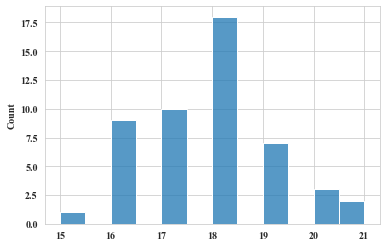

In [545]:
sb.histplot(data=total_action[11][2])

1.0
50
50


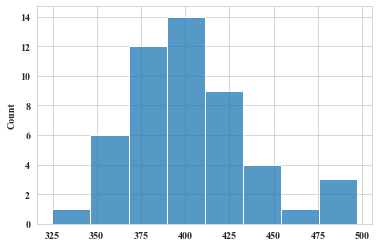

In [546]:
sb.histplot(data=total_time[11][1])
print((total_time[11][1]<500).sum() / len(total_time[11][1]))
total_time[11][1][total_time[11][1]<500].mean()

print((total_time[11][1]<500).sum())
print(len(total_time[11][1]))

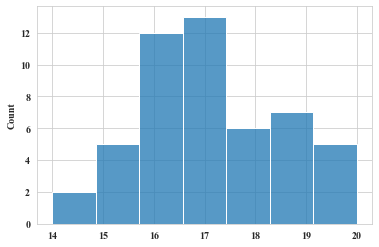

In [547]:
sb.histplot(data=total_action[11][1])

0.94
47
50


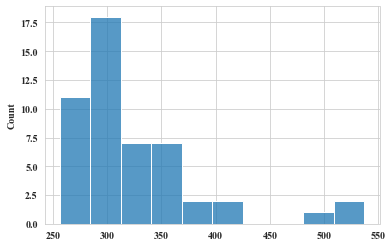

In [548]:
sb.histplot(data=total_time[8][3])
print((total_time[8][3]<450).sum() / len(total_time[8][3]))
total_time[8][3][total_time[8][3]<450].mean()

print((total_time[8][3]<450).sum())
print(len(total_time[8][3]))

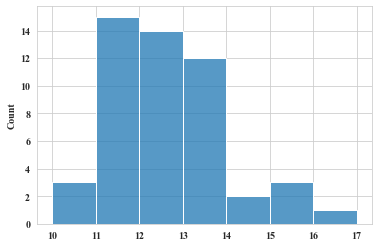

In [549]:
sb.histplot(data=total_action[8][3])

1.0


284.7826300525665

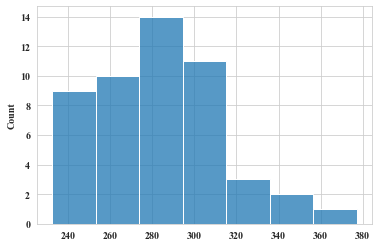

In [550]:
sb.histplot(data=total_time[8][2])
print((total_time[8][2]<400).sum() / len(total_time[8][2]))
total_time[8][2][total_time[8][2]<400].mean()

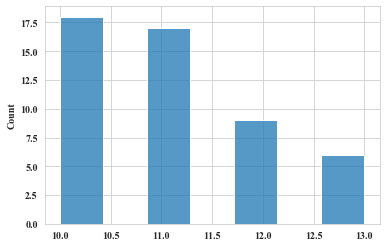

In [551]:
sb.histplot(data=total_action[8][2])

1.0


249.71624656677247

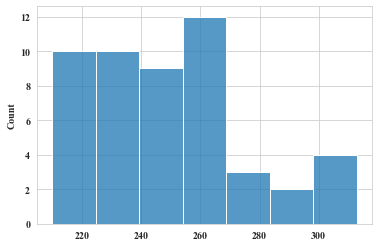

In [552]:
sb.histplot(data=total_time[8][1])
print((total_time[8][1]<350).sum() / len(total_time[8][1]))
total_time[8][1][total_time[8][1]<350].mean()

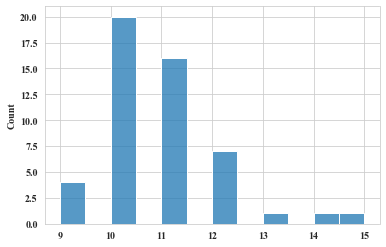

In [553]:
sb.histplot(data=total_action[8][1])

1.0


161.63908636569977

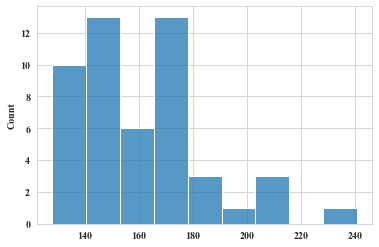

In [554]:
sb.histplot(data=total_time[5][3])
print((total_time[5][3]<250).sum() / len(total_time[5][3]))
total_time[5][3][total_time[5][3]<250].mean()

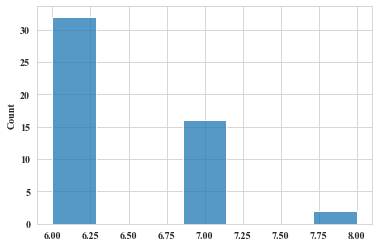

In [555]:
sb.histplot(data=total_action[5][3])

1.0


155.20222350597382

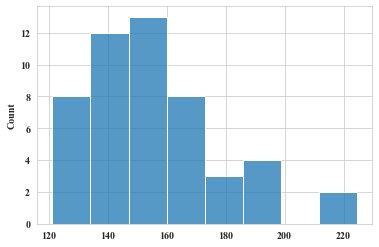

In [556]:
sb.histplot(data=total_time[5][2])
print((total_time[5][2]<250).sum() / len(total_time[5][2]))
total_time[5][2][total_time[5][2]<250].mean()

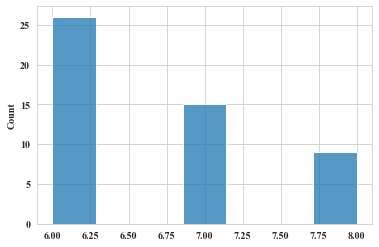

In [557]:
sb.histplot(data=total_action[5][2])

1.0


138.92107749462127

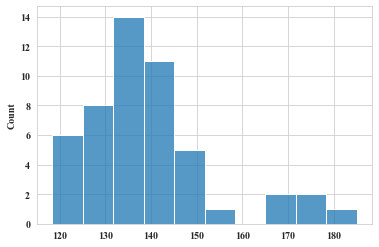

In [558]:
sb.histplot(data=total_time[5][1])
print((total_time[5][1]<250).sum() / len(total_time[5][1]))
total_time[5][1][total_time[5][1]<250].mean()

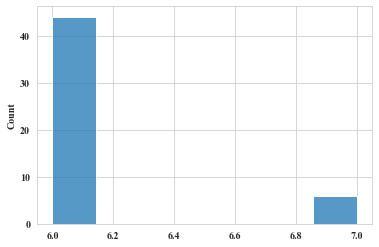

In [559]:
sb.histplot(data=total_action[5][1])

In [560]:
"""
compute the average of time for each problem and difficulty level
"""
num_objs = [11, 8, 5]
difficulties = [3, 2, 1]
probs = [1,2,3,4,5,6,7,8,9,10]
random_total_time = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
random_total_time2 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    
random_total_recon = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
random_total_action = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
random_total_remaining_area = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
for num_obj in num_objs:
    for difficulty in difficulties:
        for prob in probs:
            trials = 5
            max_trial = 6
            algo_type = 0

            for trial in range(max_trial-trials,max_trial):
                # print(' number of objects: ', num_obj, ', difficulty level: ', difficulty, 
                #       ', prob: ', prob, ', trial: ', trial, '...')
                # if the result file already exists, skip
                if algo_type == 0:
                    fname = 'results/simple/random-prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                else:
                    fname = 'results/simple/multistep-lookahead-prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)

                # fname = 'prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                if os.path.exists(fname):
                    f = open(fname, 'rb')
                    data = pickle.load(f)
                    running_time = data['running_time']
                    recon = data['num_reconstructed_objs']
                    num_action = data['num_executed_actions']

                    f.close()

                    # if data['num_reconstructed_objs'] != num_obj:
                    #     print('num_reconstructed_objs does not match')
                    #     print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                    #         (num_obj, difficulty, prob, trial))
                    #     print(data)

                    random_total_time[num_obj][difficulty].append(running_time)
                    random_total_action[num_obj][difficulty].append(num_action)
                    random_total_remaining_area[num_obj][difficulty].append(data['final_occluded_volume'])
                    if prob not in random_total_time2[num_obj][difficulty]:
                        random_total_time2[num_obj][difficulty][prob] = []
                    random_total_time2[num_obj][difficulty][prob].append(running_time)
                    random_total_recon[num_obj][difficulty].append(recon)
        random_total_recon[num_obj][difficulty] = np.array(random_total_recon[num_obj][difficulty])
        random_total_time[num_obj][difficulty] = np.array(random_total_time[num_obj][difficulty])


In [561]:
                if num_obj == 11 and difficulty == 3:
                    timeout = 700
                elif num_obj == 11 and difficulty == 2:
                    timeout = 600
                elif num_obj == 11 and difficulty == 1:
                    timeout = 500
                elif num_obj == 8 and difficulty == 3:  # TODO
                    timeout = 450
                elif num_obj == 8 and difficulty == 2:
                    timeout = 400
                elif num_obj == 8 and difficulty == 1:
                    timeout = 350
                elif num_obj == 5:
                    timeout = 250

In [562]:
timeouts = {11: {3: 700, 2: 600, 1: 500}, 8: {3: 450, 2: 400, 1: 350}, 5: {3: 250, 2: 250, 1: 250}}



In [563]:
(random_total_recon[11][3] == 11).sum() / len(random_total_recon[11][3])

0.08

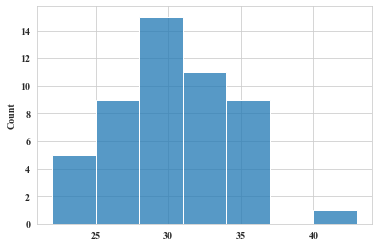

In [564]:
sb.histplot(data=random_total_action[11][3])

In [565]:
(random_total_recon[11][2] == 11).sum() / len(random_total_recon[11][2])

0.02

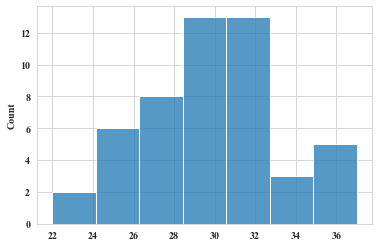

In [566]:
sb.histplot(data=random_total_action[11][2])

In [567]:
(random_total_recon[11][1] == 11).sum() / len(random_total_recon[11][1])

0.0

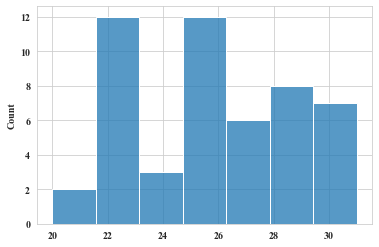

In [568]:
sb.histplot(data=random_total_action[11][1])

In [569]:
(random_total_recon[8][3] == 8).sum() / len(random_total_recon[8][3])

0.16

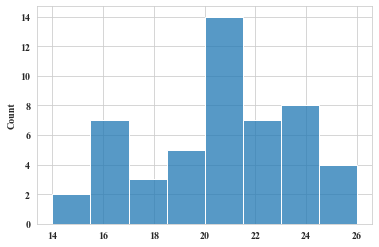

In [570]:
sb.histplot(data=random_total_action[8][3])

In [571]:
(random_total_recon[8][2] == 8).sum() / len(random_total_recon[8][2])

0.16

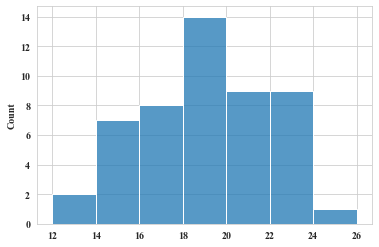

In [572]:
sb.histplot(data=random_total_action[8][2])

In [573]:
(random_total_recon[8][1] == 8).sum() / len(random_total_recon[8][1])

0.26

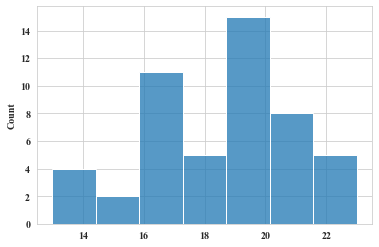

In [574]:
sb.histplot(data=random_total_action[8][1])

In [575]:
(random_total_recon[5][3] == 5).sum() / len(random_total_recon[5][3])

0.54

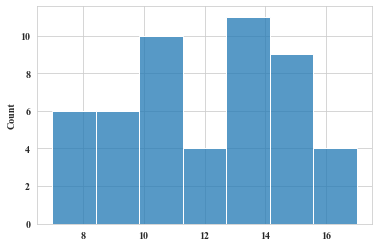

In [576]:
sb.histplot(data=random_total_action[5][3])

In [577]:
(random_total_recon[5][2] == 5).sum() / len(random_total_recon[5][2])

0.68

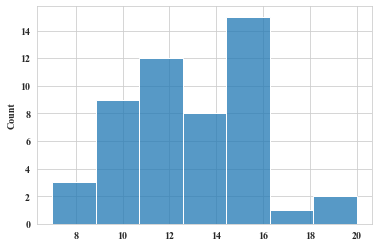

In [578]:
sb.histplot(data=random_total_action[5][2])

In [579]:
(random_total_recon[5][1] == 5).sum() / len(random_total_recon[5][1])

0.68

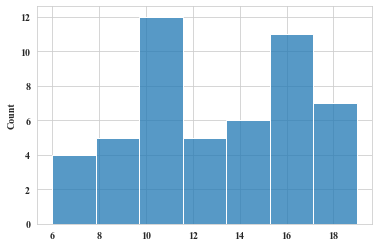

In [580]:
sb.histplot(data=random_total_action[5][1])

In [583]:
"""
compute the average of time for each problem and difficulty level
"""
num_objs = [11, 8, 5]
difficulties = [3, 2, 1]
probs = [1,2,3,4,5,6,7,8,9,10]
greedy_total_time = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
greedy_total_time2 = {11: {3: {}, 2: {}, 1: {}}, 8: {3: {}, 2: {}, 1: {}}, 5: {3: {}, 2: {}, 1: {}}}    
greedy_total_recon = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}    
greedy_total_action = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}
greedy_total_remaining_area = {11: {3: [], 2: [], 1: []}, 8: {3: [], 2: [], 1: []}, 5: {3: [], 2: [], 1: []}}

for num_obj in num_objs:
    for difficulty in difficulties:
        for prob in probs:
            trials = 5
            max_trial = 6
            algo_type = 1

            for trial in range(max_trial-trials,max_trial):
                # print(' number of objects: ', num_obj, ', difficulty level: ', difficulty, 
                #       ', prob: ', prob, ', trial: ', trial, '...')
                # if the result file already exists, skip
                if algo_type == 0:
                    fname = 'results/simple/random-prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                else:
                    fname = 'results/simple/multistep-lookahead-prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)

                # fname = 'prob-%d-%d-%d-trial-%d-result.pkl' % (num_obj, difficulty, prob, trial)
                if os.path.exists(fname):
                    f = open(fname, 'rb')
                    data = pickle.load(f)
                    running_time = data['running_time']
                    num_action = data['num_executed_actions']
                    recon = data['num_reconstructed_objs']
                    f.close()
                    # if data['num_reconstructed_objs'] != num_obj:
                    #     print('num_reconstructed_objs does not match')
                    #     print('num_obj = %d, difficulty = %d, prob = %d, trial = %d' % \
                    #         (num_obj, difficulty, prob, trial))
                    #     print(data)

                    greedy_total_time[num_obj][difficulty].append(running_time)
                    greedy_total_action[num_obj][difficulty].append(num_action)
                    greedy_total_remaining_area[num_obj][difficulty].append(data['final_occluded_volume'])
                    if prob not in greedy_total_time2[num_obj][difficulty]:
                        greedy_total_time2[num_obj][difficulty][prob] = []
                    greedy_total_time2[num_obj][difficulty][prob].append(running_time)
                    greedy_total_recon[num_obj][difficulty].append(recon)
        greedy_total_recon[num_obj][difficulty] = np.array(greedy_total_recon[num_obj][difficulty])
        greedy_total_time[num_obj][difficulty] = np.array(greedy_total_time[num_obj][difficulty])


In [ ]:
sb.histplot(data=greedy_total_remaining_area)

In [ ]:
(greedy_total_recon[11][3] == 11).sum() / len(greedy_total_recon[11][3])

In [ ]:
sb.histplot(data=greedy_total_action[11][3])

In [ ]:
(greedy_total_recon[11][2] == 11).sum() / len(greedy_total_recon[11][2])

In [ ]:
sb.histplot(data=greedy_total_action[11][2])

In [ ]:
(greedy_total_recon[11][1] == 11).sum() / len(greedy_total_recon[11][1])

In [ ]:
sb.histplot(data=greedy_total_action[11][1])

In [ ]:
(greedy_total_recon[8][3] == 8).sum() / len(greedy_total_recon[8][3])

In [ ]:
sb.histplot(data=greedy_total_action[8][3])

In [ ]:
(greedy_total_recon[8][2] == 8).sum() / len(greedy_total_recon[8][2])

In [ ]:
sb.histplot(data=greedy_total_action[8][2])

In [ ]:
(greedy_total_recon[8][1] == 8).sum() / len(greedy_total_recon[8][1])

In [ ]:
sb.histplot(data=greedy_total_action[8][1])

In [ ]:
(greedy_total_recon[5][3] == 5).sum() / len(greedy_total_recon[5][3])

In [ ]:
sb.histplot(data=greedy_total_action[5][3])

In [ ]:
(greedy_total_recon[5][2] == 5).sum() / len(greedy_total_recon[5][2])

In [ ]:
sb.histplot(data=greedy_total_action[5][2])

In [ ]:
(greedy_total_recon[5][1] == 5).sum() / len(greedy_total_recon[5][1])

In [ ]:
sb.histplot(data=greedy_total_action[5][1])

In [ ]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')



In [ ]:
# box plot of number of reconstruction objects for 5
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")

total_action_5 = np.concatenate([total_action[5][1],total_action[5][2],total_action[5][3]], axis=0)
random_total_action_5 = np.concatenate([random_total_action[5][1],random_total_action[5][2],random_total_action[5][3]], axis=0)
greedy_total_action_5 = np.concatenate([greedy_total_action[5][1],greedy_total_action[5][2],greedy_total_action[5][3]], axis=0)

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(8,6))
# ax.set(ylim=(0, 40))

ax = sb.boxplot(ax=ax,data=[random_total_action_5, greedy_total_action_5, total_action_5],palette=my_pal)#palette="Set3")

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 5-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')

plt.yticks(fontsize=20, fontname='Times New Roman')
# plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.01)
fig.savefig("recon-obj-5.pdf", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20)
# plt.yticks(np.arange(8), np.arange)


In [ ]:
# box plot of number of reconstruction objects for 5

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")
num_obj = 8
total_action_ = np.concatenate([total_action[num_obj][1],total_action[num_obj][2],total_action[num_obj][3]], axis=0)
random_total_action_ = np.concatenate([random_total_action[num_obj][1],random_total_action[num_obj][2],random_total_action[num_obj][3]], axis=0)
greedy_total_action_ = np.concatenate([greedy_total_action[num_obj][1],greedy_total_action[num_obj][2],greedy_total_action[num_obj][3]], axis=0)

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(8,6))
# ax.set(ylim=(0, 40))

ax = sb.boxplot(ax=ax,data=[random_total_action_, greedy_total_action_, total_action_],palette=my_pal)#palette="Set3")

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')

plt.yticks(fontsize=20, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.01)
fig.savefig("recon-obj-8.pdf", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


In [ ]:
# box plot of number of reconstruction objects for 5

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")
num_obj = 11
total_action_ = np.concatenate([total_action[num_obj][1],total_action[num_obj][2],total_action[num_obj][3]], axis=0)
random_total_action_ = np.concatenate([random_total_action[num_obj][1],random_total_action[num_obj][2],random_total_action[num_obj][3]], axis=0)
greedy_total_action_ = np.concatenate([greedy_total_action[num_obj][1],greedy_total_action[num_obj][2],greedy_total_action[num_obj][3]], axis=0)

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(8,6))
# ax.set(ylim=(0, 40))

ax = sb.boxplot(ax=ax,data=[random_total_action_, greedy_total_action_, total_action_],palette=my_pal)#palette="Set3")

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 11-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')

plt.yticks(fontsize=20, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.01)

fig.savefig("recon-obj-11.pdf", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


In [ ]:
sb.histplot(data=total_action_5)
sb.histplot(data=random_total_action_5)
sb.histplot(data=greedy_total_action_5)

In [584]:
import pandas as pd
import matplotlib.pyplot as plt


In [585]:
# box plot of number of reconstruction objects for 5

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")
# data = []
data = {"algo": [], "difficulty": [], "time": [], 'action': [], 'remaining_occlusion': []}
for num_obj in [5, 8, 11]:
    for dif in [1, 2, 3]:
        for i in range(len(total_time[num_obj][dif])):
            data['algo'].append('ours')
            data['difficulty'].append('%d-%d'%(num_obj,dif))
            data['time'].append(total_time[num_obj][dif][i])
            data['action'].append(total_action[num_obj][dif][i])
            data['remaining_occlusion'].append(total_remaining_area[num_obj][dif][i])

for num_obj in [5, 8, 11]:
    for dif in [1, 2, 3]:
        for i in range(len(random_total_time[num_obj][dif])):
            data['algo'].append('random')
            data['difficulty'].append('%d-%d'%(num_obj,dif))
            data['time'].append(random_total_time[num_obj][dif][i])
            data['action'].append(random_total_action[num_obj][dif][i])
            data['remaining_occlusion'].append(random_total_remaining_area[num_obj][dif][i])

            
for num_obj in [5, 8, 11]:
    for dif in [1, 2, 3]:
        for i in range(len(greedy_total_time[num_obj][dif])):
            data['algo'].append('greedy')
            data['difficulty'].append('%d-%d'%(num_obj,dif))
            data['time'].append(greedy_total_time[num_obj][dif][i])
            data['action'].append(greedy_total_action[num_obj][dif][i])
            data['remaining_occlusion'].append(greedy_total_remaining_area[num_obj][dif][i])

pd_data = pd.DataFrame(data)


In [586]:
pd_data

,algo,difficulty,time,action,remaining_occlusion
0,ours,5-1,132.098492,6,0
1,ours,5-1,125.971331,6,0
2,ours,5-1,139.472471,6,0
3,ours,5-1,131.098691,6,0
4,ours,5-1,140.258562,6,0
...,...,...,...,...,...
1345,greedy,11-3,679.415380,23,60
1346,greedy,11-3,659.953446,24,242
1347,greedy,11-3,638.018527,23,0
1348,greedy,11-3,710.397494,23,700


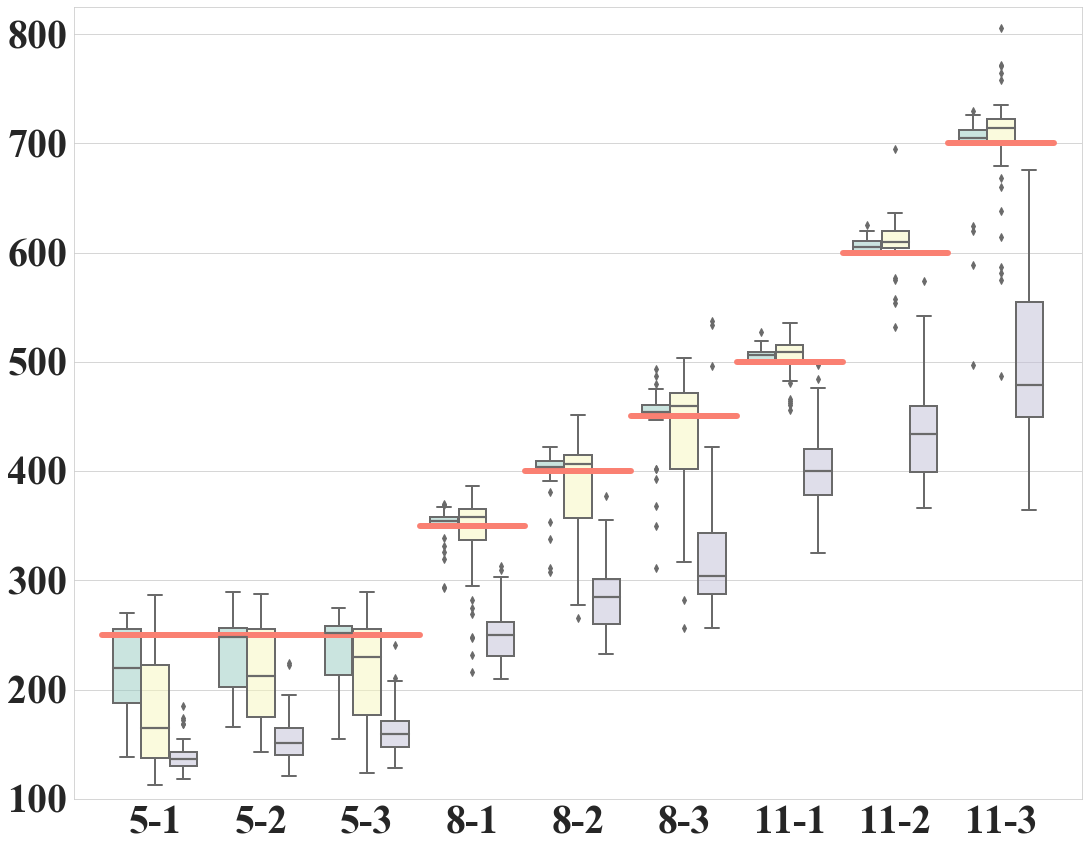

In [587]:

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
# my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(14,11))
# ax.set(ylim=(0, 40))

order = ["5-1","5-2","5-3","8-1","8-2","8-3","11-1","11-2","11-3"]
hue_order = ["random", "greedy", "ours"]
ax = sb.boxplot(ax=ax, x="difficulty", y="time", hue="algo", data=pd_data, linewidth=2,
                order=order, hue_order=hue_order, palette="Set3", medianprops=dict(linewidth=2.2))

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')
# #* timeout
ax.plot([-0.5,2.5],[250,250], linewidth=6, color='salmon', alpha=1)
ax.plot([2.5,3.5],[350,350], linewidth=6, color='salmon', alpha=1)
ax.plot([3.5,4.5],[400,400], linewidth=6, color='salmon', alpha=1)
ax.plot([4.5,5.5],[450,450], linewidth=6, color='salmon', alpha=1)
ax.plot([5.5,6.5],[500,500], linewidth=6, color='salmon', alpha=1)
ax.plot([6.5,7.5],[600,600], linewidth=6, color='salmon', alpha=1)
ax.plot([7.5,8.5],[700,700], linewidth=6, color='salmon', alpha=1)


ax.set(xlabel=None,ylabel=None, ylim=(100, 825))
ax.get_legend().remove()

plt.xticks(fontsize=40, fontname='Times New Roman')

plt.yticks(fontsize=40, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.0)
fig.savefig("time-plot.pdf", bbox_inches='tight')
fig.savefig("time-plot.svg", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])







In [283]:
pd_data

,algo,difficulty,action
0,ours,5-1,6
1,ours,5-1,6
2,ours,5-1,6
3,ours,5-1,6
4,ours,5-1,6
...,...,...,...
1345,greedy,11-3,23
1346,greedy,11-3,24
1347,greedy,11-3,23
1348,greedy,11-3,23


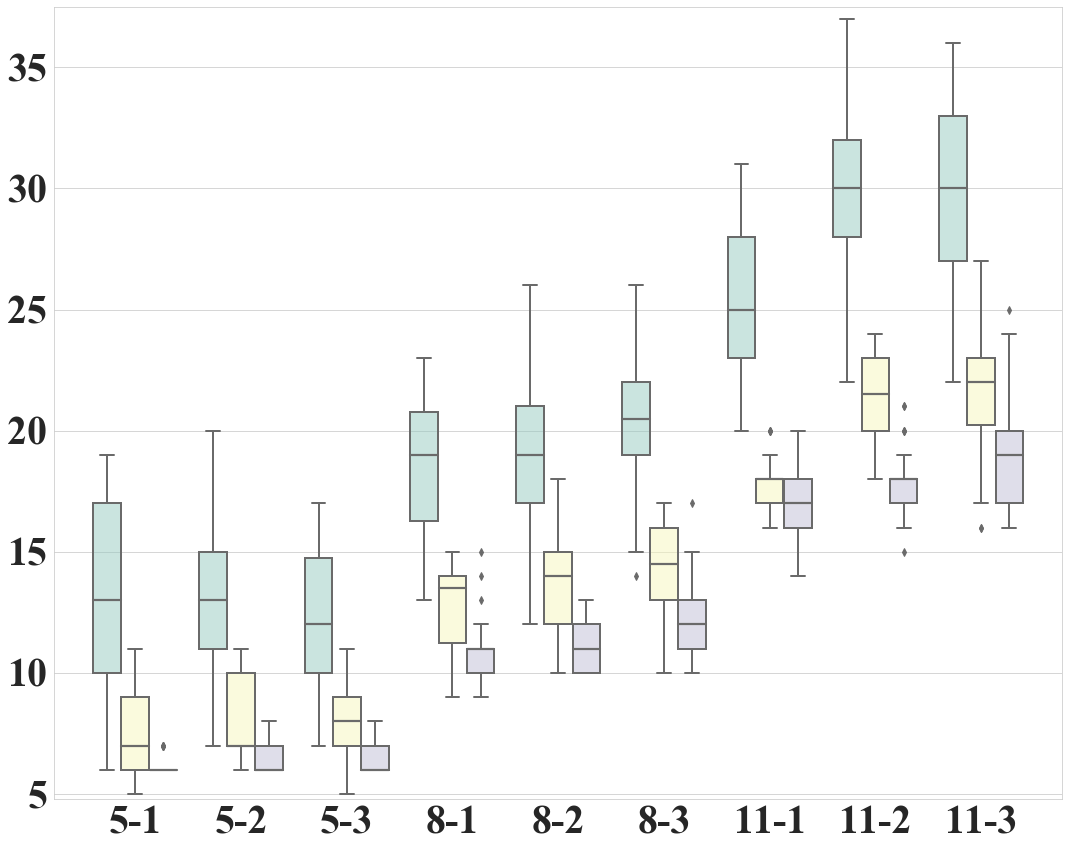

In [588]:

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
# my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(14,11))
# ax.set(ylim=(0, 40))

order = ["5-1","5-2","5-3","8-1","8-2","8-3","11-1","11-2","11-3"]
hue_order = ["random", "greedy", "ours"]
ax = sb.boxplot(ax=ax, x="difficulty", y="action", hue="algo", data=pd_data, linewidth=2,
                order=order, hue_order=hue_order, palette="Set3", medianprops=dict(linewidth=2.2))

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')
ax.set(xlabel=None,ylabel=None, ylim=(4.8,37.5))
ax.get_legend().remove()

plt.xticks(fontsize=40, fontname='Times New Roman')

plt.yticks(fontsize=40, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.0)
fig.savefig("action-plot.pdf", bbox_inches='tight')
fig.savefig('action-plot.svg', bbox_inches='tight')
# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


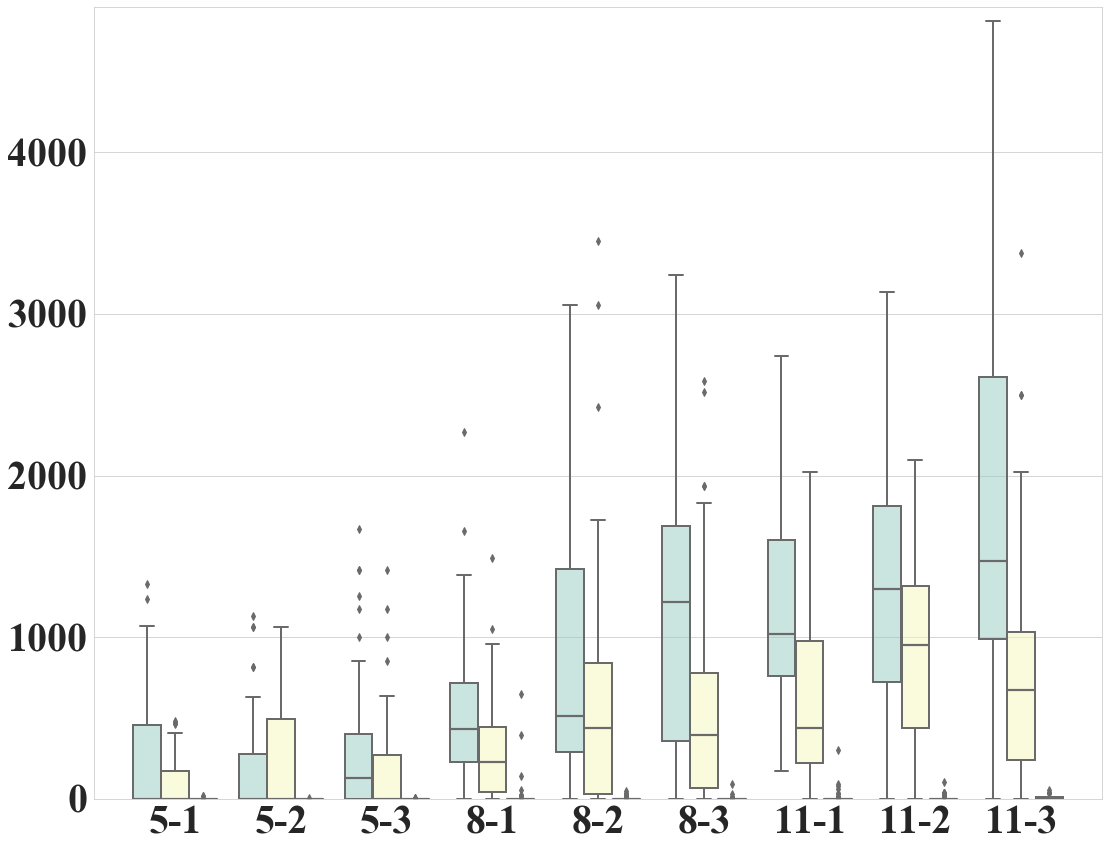

In [591]:

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
# my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(14,11))
# ax.set(ylim=(0, 40))

order = ["5-1","5-2","5-3","8-1","8-2","8-3","11-1","11-2","11-3"]
hue_order = ["random", "greedy", "ours"]
ax = sb.boxplot(ax=ax, x="difficulty", y="remaining_occlusion", hue="algo", data=pd_data, linewidth=2,
                order=order, hue_order=hue_order, palette="Set3", medianprops=dict(linewidth=2.2))

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')
ax.set(xlabel=None,ylabel=None, ylim=(0,4900))
ax.get_legend().remove()

plt.xticks(fontsize=40, fontname='Times New Roman')

plt.yticks(fontsize=40, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.0)
fig.savefig("remaining-occlusion-plot.pdf", bbox_inches='tight')
fig.savefig('remaining-occlusion-plot.svg', bbox_inches='tight')
# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


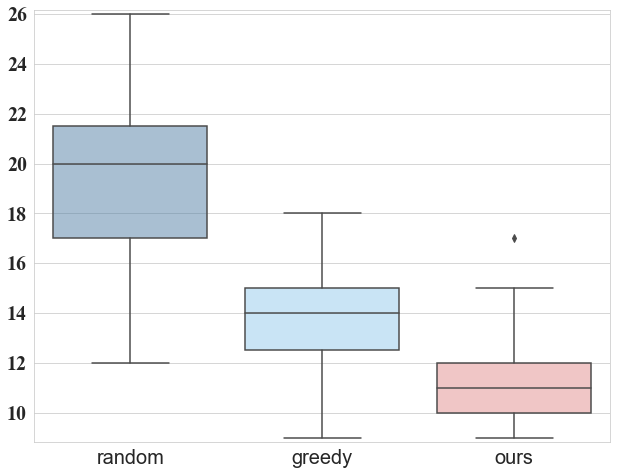

In [76]:
# box plot of number of reconstruction objects for 5

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")
num_obj = 8
total_time_ = np.concatenate([total_time[num_obj][1],total_time[num_obj][2],total_time[num_obj][3]], axis=0)
random_total_time_ = np.concatenate([random_total_time[num_obj][1],random_total_time[num_obj][2],random_total_time[num_obj][3]], axis=0)
greedy_total_time_ = np.concatenate([greedy_total_time[num_obj][1],greedy_total_time[num_obj][2],greedy_total_time[num_obj][3]], axis=0)

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(8,6))
# ax.set(ylim=(0, 40))

ax = sb.boxplot(ax=ax,data=[random_total_time_, greedy_total_time_, total_time_],palette=my_pal)#palette="Set3")

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')

plt.yticks(fontsize=20, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.01)
fig.savefig("time-obj-8.pdf", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


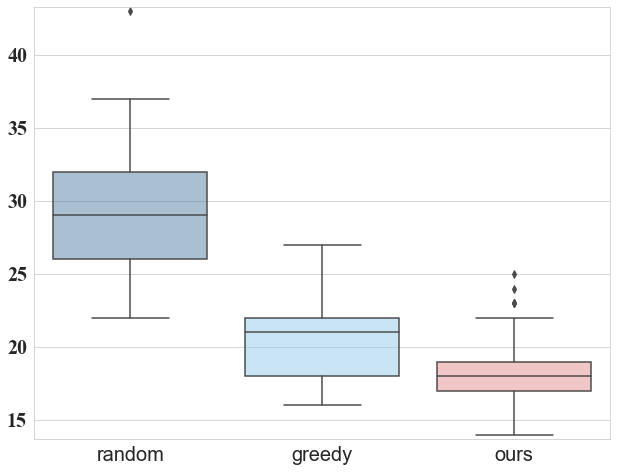

In [77]:
# box plot of number of reconstruction objects for 5

# sns.axlabel(xlabel="Groups", ylabel="Y-Axis", fontsize=16)
sb.set_style("whitegrid")
num_obj = 11
total_time_ = np.concatenate([total_time[num_obj][1],total_time[num_obj][2],total_time[num_obj][3]], axis=0)
random_total_time_ = np.concatenate([random_total_time[num_obj][1],random_total_time[num_obj][2],random_total_time[num_obj][3]], axis=0)
greedy_total_time_ = np.concatenate([greedy_total_time[num_obj][1],greedy_total_time[num_obj][2],greedy_total_time[num_obj][3]], axis=0)

# my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
my_pal = {0: 'steelblue', 1: 'lightskyblue', 2: 'lightcoral'}

fig, ax = plt.subplots(figsize=(8,6))
# ax.set(ylim=(0, 40))

ax = sb.boxplot(ax=ax,data=[random_total_time_, greedy_total_time_, total_time_],palette=my_pal)#palette="Set3")

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

# plt.title('Number of Actions for 8-Object Scenarios', fontsize=20)
# ax.set_xlabel('Algorithm', fontsize=12)
# ax.set_ylabel('Number of Actions', fontsize=12)

# plt.xticks(np.arange(3), [])
plt.xticks(np.arange(3), ['random', 'greedy', 'ours'], fontsize=20, fontname='Times New Roman')

plt.yticks(fontsize=20, fontname='Times New Roman')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0.01)
fig.savefig("time-obj-11.pdf", bbox_inches='tight')

# plt.xticks(np.arange(3), ['random', 'greedy', 'ours'])


In [593]:
pd_data.to_csv("simple_geometry_result.csv")